# Simple Brown-Conrady Model

This is probably the simplest fisheye model out there.

Based on [OpenCV's implementation](https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html).

## Imports

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## The Fisheye Image
> Note: this was artificially generated

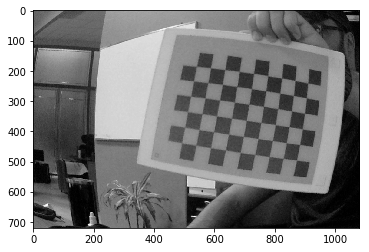

In [2]:
img = cv.imread('calibration2.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

# Undistort with Brown Model

(720, 1080)


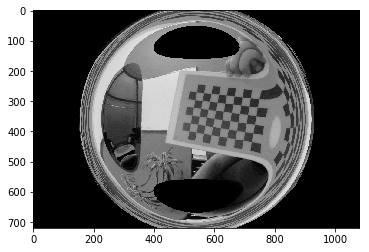

In [12]:
img = cv.imread('calibration2.jpg', cv.IMREAD_GRAYSCALE)

(rows, cols) = img.shape
dst = np.zeros(img.shape)

xc = cols/2
yc = rows/2

k1 = -3.21333953e+00
k2 = 2.42720475e+01
k3 = -1.16149731e+02
p1 = 1.06949129e-02
p2 = 1.32269852e-01

cam = np.float32([[3.23834302e+03, 0.00000000e+00, 5.74370752e+02],
                 [0.00000000e+00, 6.40878223e+03, 3.59526187e+02]])

for yu in range(rows):
    for xu in range(cols):
        r = np.sqrt((xu - xc)**2 + (yu - yc)**2)
        r = r/np.sqrt(xc**2 + yc**2)
        m = 1 + k1*(r**2) + k2*(r**4) + k3*(r**6)
        
        # Replace here with an interpolator
        xd = int(xu + m*(xu - xc))
        yd = int(yu + m*(yu - yc))
        if xd >= 0 and xd < cols and yd >= 0 and yd < rows:
            dst[yu,xu] = img[yd,xd]

plt.imshow(dst, cmap='gray')
print(dst.shape)

# Computing the Optimal Matrix

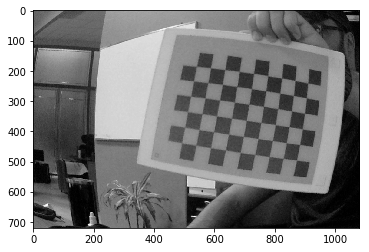

In [13]:
img = cv.imread('calibration2.jpg', cv.IMREAD_GRAYSCALE)

(rows, cols) = img.shape
dst = np.zeros(img.shape)

k1 = -3.21333953e+00
k2 = 2.42720475e+01
k3 = -1.16149731e+02

p1 = -2.32792733e-02
p2 = 1.29952645e-03

cam = np.float32([
    [2.04975901e+03, 0.00000000e+00, 5.43560835e+02],
    [0.00000000e+00, 2.18894242e+03, 3.65582945e+02],
    [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]
])

fx = cam[0,0]
fy = cam[1,1]
cx = cam[0,2]
cy = cam[1,2]

for yu in range(rows):
    for xu in range(cols):
        x_ = (xu - cx)/fx
        y_ = (yu - cy)/fy

        r = np.sqrt(x_**2 + y_**2)
        m = 1 + k1*(r**2) + k2*(r**4) + k3*(r**6)
        
        
        xd_ = x_*m + 2*p1*x_*y_ + p2*(r**2 + 2*x_**2)
        yd_ = y_*m + 2*p2*x_*y_ + p1*(r**2 + 2* y_**2)

        ## Use interpolator here!!!
        xd = int(xd_*fx + cx)
        yd = int(yd_*fy + cy)

        if xd >= 0 and xd < cols and yd >= 0 and yd < rows:
            dst[yu,xu] = img[yd,xd]

plt.imshow(img, cmap='gray')
plt.figure()
plt.imshow(dst, cmap='gray')